In \[9\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import random as rand
    import math
    import io
     

In \[ \]:

     

In \[10\]:

    df = pd.read_csv('netflix_titles.csv')
    # df = pd.read_csv(uploaded)

    df.head()

Out\[10\]:

|     | show_id | type    | title                 | director        | cast                                              | country       | date_added         | release_year | rating | duration  | listed_in                                         | description                                       |
|-----|---------|---------|-----------------------|-----------------|---------------------------------------------------|---------------|--------------------|--------------|--------|-----------|---------------------------------------------------|---------------------------------------------------|
| 0   | s1      | Movie   | Dick Johnson Is Dead  | Kirsten Johnson | NaN                                               | United States | September 25, 2021 | 2020         | PG-13  | 90 min    | Documentaries                                     | As her father nears the end of his life, filmm... |
| 1   | s2      | TV Show | Blood & Water         | NaN             | Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban... | South Africa  | September 24, 2021 | 2021         | TV-MA  | 2 Seasons | International TV Shows, TV Dramas, TV Mysteries   | After crossing paths at a party, a Cape Town t... |
| 2   | s3      | TV Show | Ganglands             | Julien Leclercq | Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi... | NaN           | September 24, 2021 | 2021         | TV-MA  | 1 Season  | Crime TV Shows, International TV Shows, TV Act... | To protect his family from a powerful drug lor... |
| 3   | s4      | TV Show | Jailbirds New Orleans | NaN             | NaN                                               | NaN           | September 24, 2021 | 2021         | TV-MA  | 1 Season  | Docuseries, Reality TV                            | Feuds, flirtations and toilet talk go down amo... |
| 4   | s5      | TV Show | Kota Factory          | NaN             | Mayur More, Jitendra Kumar, Ranjan Raj, Alam K... | India         | September 24, 2021 | 2021         | TV-MA  | 2 Seasons | International TV Shows, Romantic TV Shows, TV ... | In a city of coaching centers known to train I... |

In \[11\]:

    missing_val=[]

    for i in df.columns:
      missing=df[i].isnull().sum()
      missing_val.append(missing)
      print("number of missing in column",i,":",missing)
    print(missing_val)

    number of missing in column show_id : 0
    number of missing in column type : 0
    number of missing in column title : 0
    number of missing in column director : 2634
    number of missing in column cast : 825
    number of missing in column country : 831
    number of missing in column date_added : 10
    number of missing in column release_year : 0
    number of missing in column rating : 4
    number of missing in column duration : 3
    number of missing in column listed_in : 0
    number of missing in column description : 0
    [0, 0, 0, 2634, 825, 831, 10, 0, 4, 3, 0, 0]

In \[12\]:

    number_of_movies=df['type'].value_counts()["Movie"]
    number_of_tv_shows=df['type'].value_counts()["TV Show"]
    print(number_of_movies,number_of_tv_shows)

    6131 2676

# Percentage of TV shows VS percentage of movies.<a href="#Percentage-of-TV-shows-VS-percentage-of-movies." class="anchor-link">¶</a>

In \[118\]:

    # fig = plt.figure(figsize = (10, 5))
    l=[number_of_movies,number_of_tv_shows]
    labells=["movie","tv show"]
    color=["#97BFB4","#DD4A48"]
    explode_val=[0.1,0.1]
    plt.pie(l,labels=labells,explode=explode_val,shadow=True,colors=color,autopct='%1.1f%%')
    plt.legend()
    plt.show()
    # plt.bar(courses, values, color ='maroon',
    #         width = 0.4)

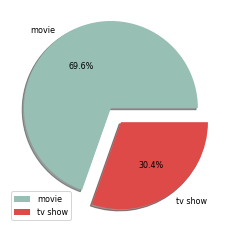

In \[119\]:

    types_of_movies=[]
    for i,j in zip(df["type"],df["listed_in"]):
      if(i=="Movie"):
        types_of_movies.append(j)
    # print(len(types_of_movies))
    # print("\n\n\n\n\n")
    #print(types_of_movies)
    ######################################3
    types_of_tv_shows=[]
    for i,j in zip(df["type"],df["listed_in"]):
      if(i=="TV Show"):
        types_of_tv_shows.append(j)
    # print(len(types_of_tv_shows))
    # print("\n\n\n\n\n")
    #print(types_of_tv_shows)
    ############################
    types_rating_movies=set()
    types_rating_tv_shows=set()
    for i,j in zip(df["type"],df["rating"]):
      if(i=="Movie"):
        types_rating_movies.add(j)
    ###############################
    for i,j in zip(df["type"],df["rating"]):
      if(i=="TV Show"):
        types_rating_tv_shows.add(j)

In \[123\]:

    num_of_movies_for_each_type={}
    num_of_tvshows_for_each_type={}
    for i in range(len(types_of_movies)):
      num_of_movies_for_each_type[types_of_movies[i]]=len([ g for j,g in zip(df["type"],df["listed_in"]) if j=="Movie" and g==types_of_movies[i]])
    #print(num_of_movies_for_each_type)
    #####################################
    for i in range(len(types_of_tv_shows)):
      num_of_tvshows_for_each_type[types_of_tv_shows[i]]=len([ g for j,g in zip(df["type"],df["listed_in"]) if j=="TV Show" and g==types_of_tv_shows[i]])

    #print(num_of_tvshows_for_each_type)
    ########################################
    #print(len(num_of_movies_for_each_type.keys()))

    278

# Number of movies per genre.<a href="#Number-of-movies-per-genre." class="anchor-link">¶</a>

In \[127\]:

    ke=num_of_movies_for_each_type.keys()
    val=num_of_movies_for_each_type.values()
    # print(len(ke))
    plt.figure(figsize=(50,50))
    plt.rcParams.update({'font.size': 22}) # must set in top
    plt.bar(ke,val,color=['b', 'r', 'g', 'y', 'k','c'])
    plt.xlim(0,6)
    # plt.legend()
    plt.title("MOVIES AND THE NUMBER OF MOVIES FOR EACH TYPE")
    plt.show()

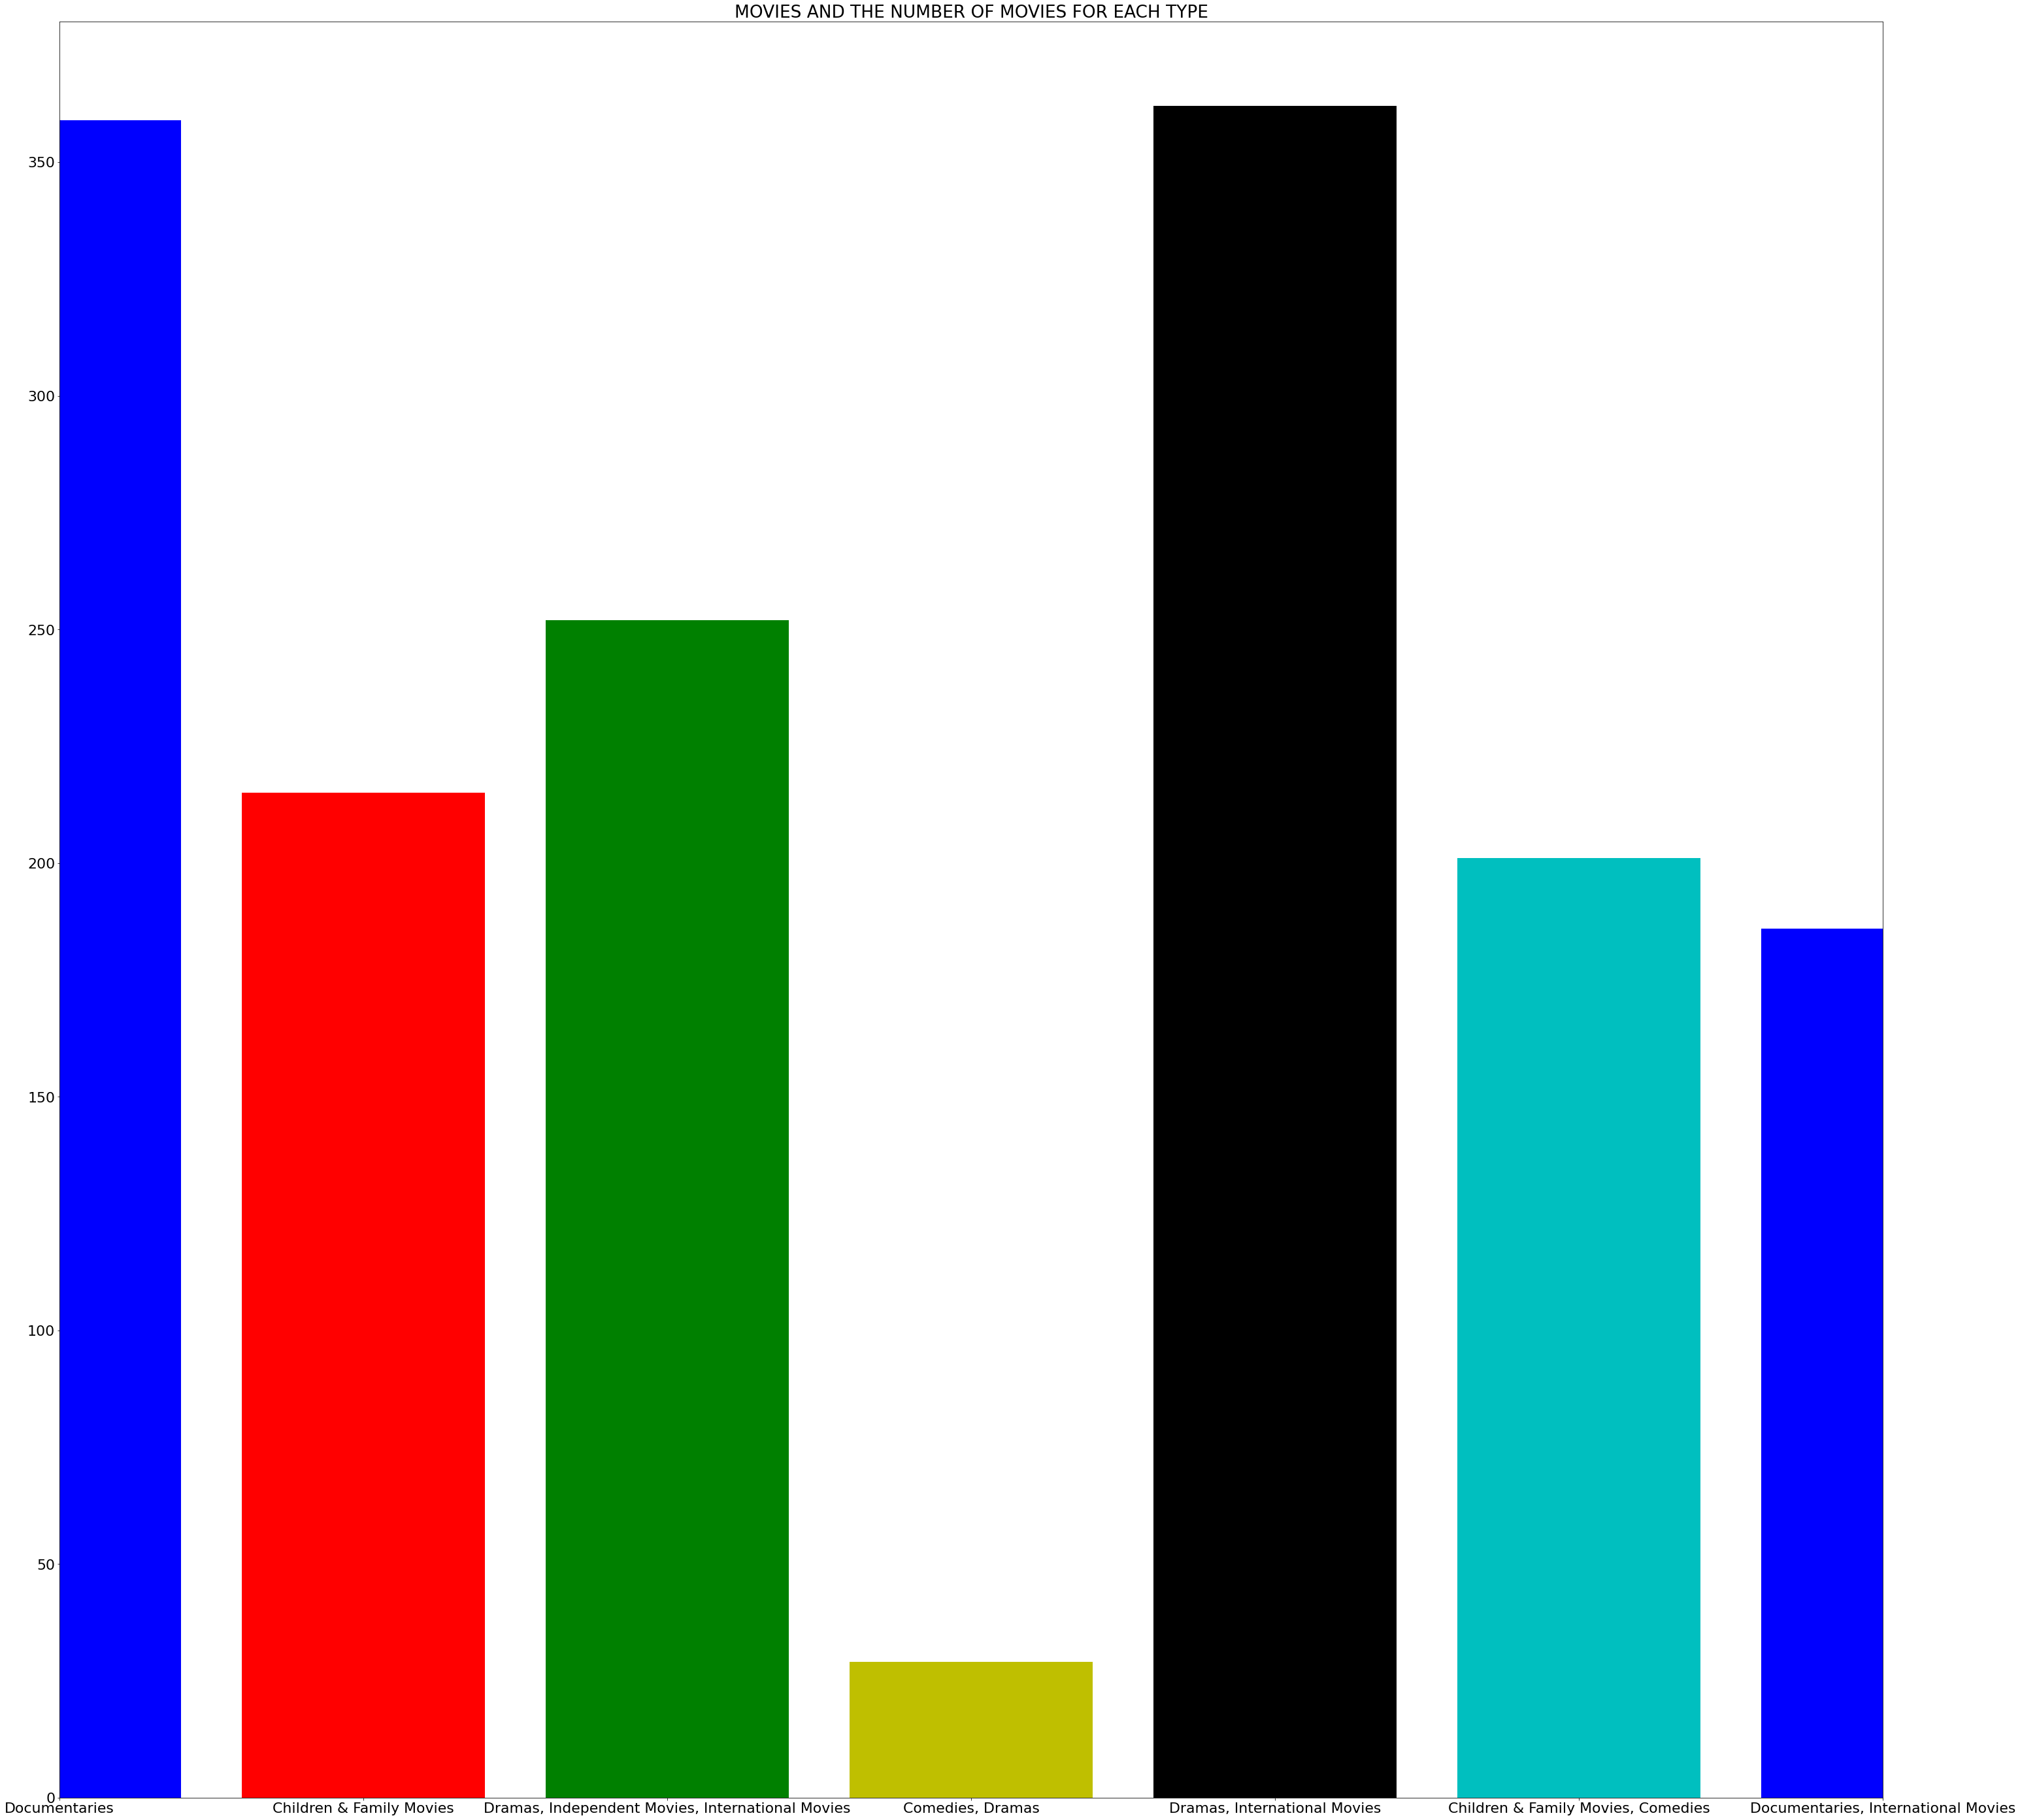

# Number of TV shows per genre.<a href="#Number-of-TV-shows-per-genre." class="anchor-link">¶</a>

In \[128\]:

    ke2=num_of_tvshows_for_each_type.keys()
    val2=num_of_tvshows_for_each_type.values()
    # print(len(ke))
    plt.figure(figsize=(60,50))
    plt.rcParams.update({'font.size': 26}) # must set in top
    plt.bar(ke2,val2,color=['b', 'r', 'g', 'y', 'k','c'])
    plt.xlim(0,5)
    # plt.legend()
    plt.title("TV SHOWS AND THE NUMEBR OF SHOWS FOR EACH CATERGORY ")
    plt.show()

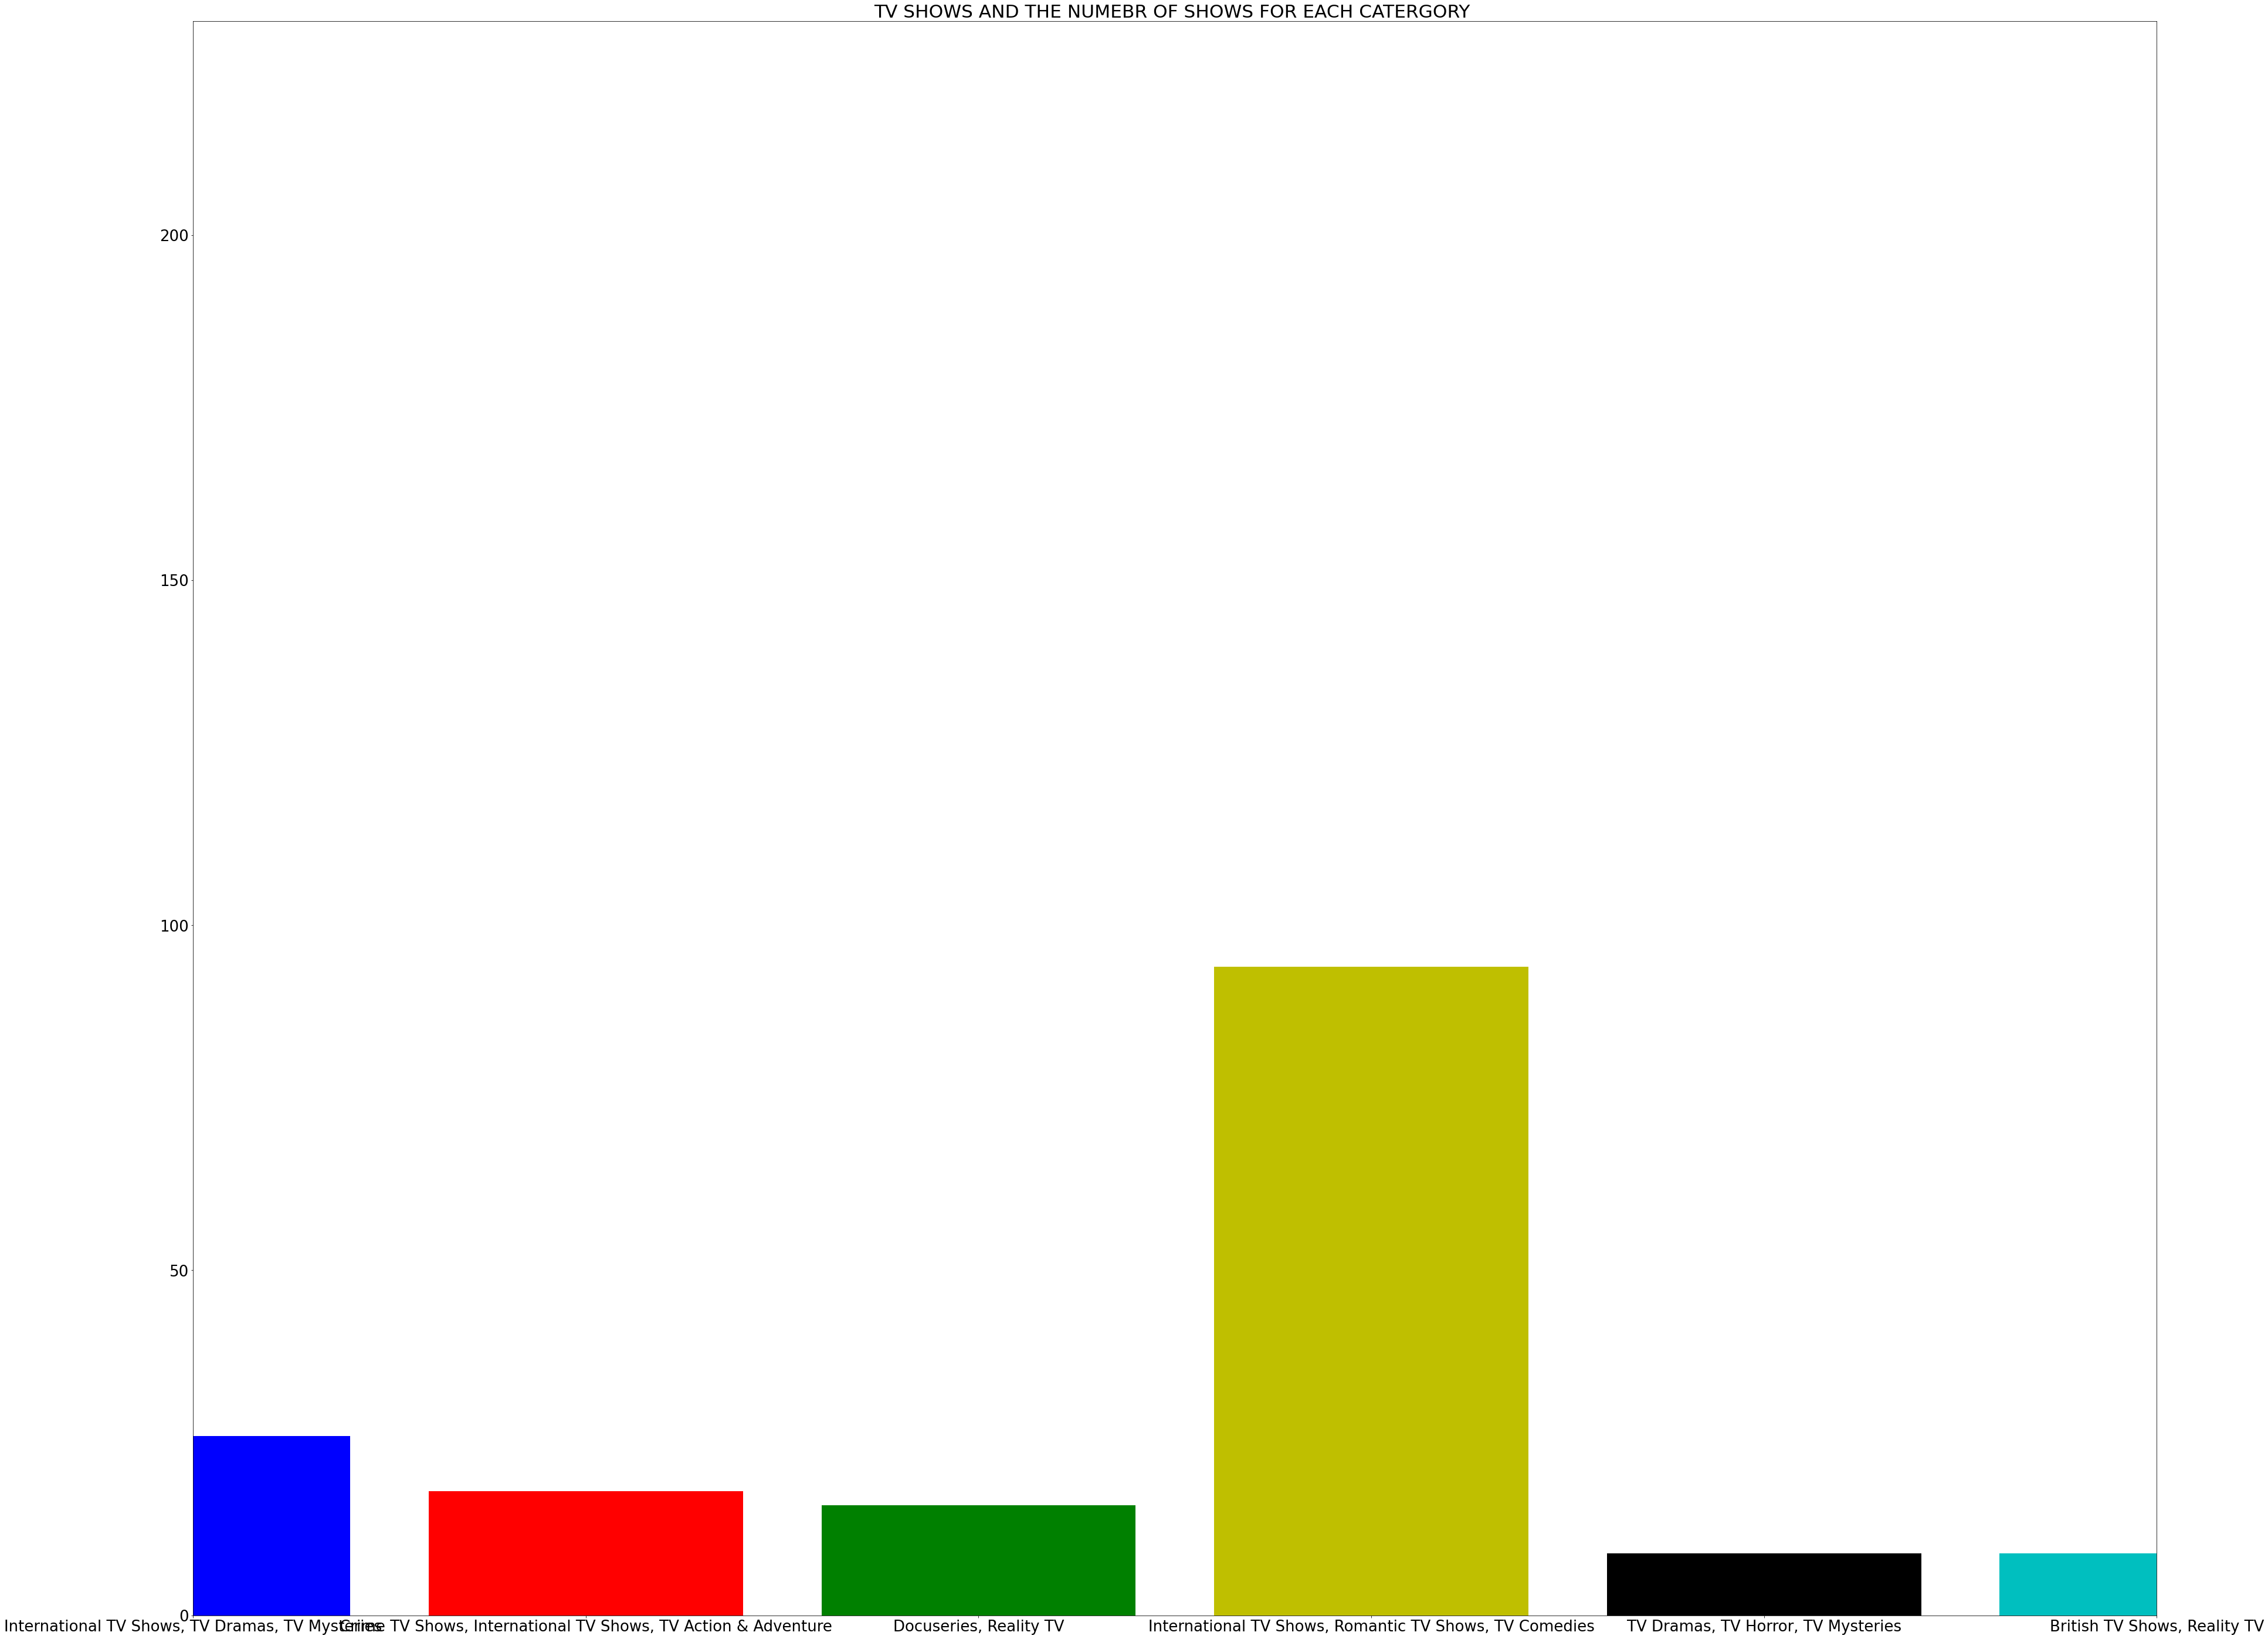

In \[96\]:

    Movies_after_year_2000=df[(df.type == 'Movie') & (df.release_year >= 2000)]
    Movies_after_year_2000.loc[:,['type','release_year','title']]

Out\[96\]:

|      | type  | release_year | title                            |
|------|-------|--------------|----------------------------------|
| 0    | Movie | 2020         | Dick Johnson Is Dead             |
| 6    | Movie | 2021         | My Little Pony: A New Generation |
| 9    | Movie | 2021         | The Starling                     |
| 12   | Movie | 2021         | Je Suis Karl                     |
| 13   | Movie | 2021         | Confessions of an Invisible Girl |
| ...  | ...   | ...          | ...                              |
| 8801 | Movie | 2015         | Zinzana                          |
| 8802 | Movie | 2007         | Zodiac                           |
| 8804 | Movie | 2009         | Zombieland                       |
| 8805 | Movie | 2006         | Zoom                             |
| 8806 | Movie | 2015         | Zubaan                           |

5655 rows × 3 columns

In \[97\]:

    Movies_before_year_2000=df[(df.type == 'Movie') & (df.release_year < 2000)]
    Movies_before_year_2000.loc[:,['type','release_year','title']]

Out\[97\]:

|      | type  | release_year | title                               |
|------|-------|--------------|-------------------------------------|
| 7    | Movie | 1993         | Sankofa                             |
| 22   | Movie | 1996         | Avvai Shanmughi                     |
| 24   | Movie | 1998         | Jeans                               |
| 26   | Movie | 1997         | Minsara Kanavu                      |
| 41   | Movie | 1975         | Jaws                                |
| ...  | ...   | ...          | ...                                 |
| 8745 | Movie | 1971         | Willy Wonka & the Chocolate Factory |
| 8748 | Movie | 1981         | Winter of Our Dreams                |
| 8763 | Movie | 1943         | WWII: Report from the Aleutians     |
| 8764 | Movie | 1994         | Wyatt Earp                          |
| 8792 | Movie | 1973         | Young Tiger                         |

476 rows × 3 columns

# Percentage of movies before 2000 VS percentage of movies after 2000.<a href="#Percentage-of-movies-before-2000-VS-percentage-of-movies-after-2000." class="anchor-link">¶</a>

In \[117\]:

    import matplotlib as mpl
    mpl.rcParams['font.size'] = 8.0
    index = Movies_after_year_2000.index
    number_of_rows_aft = len(index)
    number_of_rows_aft
    index = Movies_before_year_2000.index
    number_of_rows_bef = len(index)
    number_of_rows_bef
    l=[number_of_rows_aft,number_of_rows_bef]
    labells=["movies after year 2000","movies before year 2000"]
    color=["#97BFB4","#DD4A48"]
    explode_val=[0.1,0.1]
    plt.pie(l,labels=labells,explode=explode_val,shadow=True,colors=color,autopct='%1.1f%%')
    plt.legend()
    plt.show()

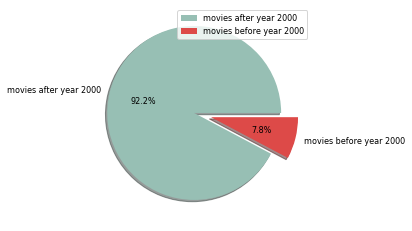

In \[99\]:

    TVShow_after_year_2000=df[(df.type == 'TV Show') & (df.release_year >= 2000)]
    TVShow_after_year_2000.loc[:,['type','release_year','title']]

Out\[99\]:

|      | type    | release_year | title                 |
|------|---------|--------------|-----------------------|
| 1    | TV Show | 2021         | Blood & Water         |
| 2    | TV Show | 2021         | Ganglands             |
| 3    | TV Show | 2021         | Jailbirds New Orleans |
| 4    | TV Show | 2021         | Kota Factory          |
| 5    | TV Show | 2021         | Midnight Mass         |
| ...  | ...     | ...          | ...                   |
| 8795 | TV Show | 2015         | Yu-Gi-Oh! Arc-V       |
| 8796 | TV Show | 2016         | Yunus Emre            |
| 8797 | TV Show | 2016         | Zak Storm             |
| 8800 | TV Show | 2012         | Zindagi Gulzar Hai    |
| 8803 | TV Show | 2018         | Zombie Dumb           |

2627 rows × 3 columns

In \[100\]:

    TVShow_before_year_2000=df[(df.type == 'TV Show') & (df.release_year < 2000)]
    TVShow_before_year_2000.loc[:,['type','release_year','title']]

Out\[100\]:

|      | type    | release_year | title                                |
|------|---------|--------------|--------------------------------------|
| 67   | TV Show | 1994         | Saved by the Bell                    |
| 160  | TV Show | 1992         | Major Dad                            |
| 813  | TV Show | 1993         | The Adventures of Sonic the Hedgehog |
| 868  | TV Show | 1997         | The Magic School Bus                 |
| 1331 | TV Show | 1945         | Five Came Back: The Reference Films  |
| 1639 | TV Show | 1999         | Heartbreak High                      |
| 2073 | TV Show | 1998         | Sister, Sister                       |
| 2301 | TV Show | 1993         | Supermarket Sweep                    |
| 2444 | TV Show | 1999         | Cardcaptor Sakura                    |
| 2740 | TV Show | 1986         | Saint Seiya                          |
| 3724 | TV Show | 1995         | Neon Genesis Evangelion              |
| 4250 | TV Show | 1925         | Pioneers: First Women Filmmakers\*   |
| 4550 | TV Show | 1972         | Monty Python's Fliegender Zirkus     |
| 4551 | TV Show | 1974         | Monty Python's Flying Circus         |
| 4946 | TV Show | 1993         | Star Trek: The Next Generation       |
| 5299 | TV Show | 1988         | High Risk                            |
| 5650 | TV Show | 1999         | Star Trek: Deep Space Nine           |
| 5908 | TV Show | 1992         | Danger Mouse: Classic Collection     |
| 5923 | TV Show | 1998         | Goosebumps                           |
| 6301 | TV Show | 1997         | Big Bad Beetleborgs                  |
| 6347 | TV Show | 1991         | Bob Ross: Beauty Is Everywhere       |
| 6456 | TV Show | 1992         | Cheers                               |
| 6459 | TV Show | 1999         | Chewin' the Fat                      |
| 6469 | TV Show | 1994         | Chill with Bob Ross                  |
| 6514 | TV Show | 1999         | Cold Case Files Classic              |
| 6549 | TV Show | 1977         | Dad's Army                           |
| 6674 | TV Show | 1979         | El Chavo                             |
| 6970 | TV Show | 1988         | Highway to Heaven                    |
| 7175 | TV Show | 1990         | Ken Burns: The Civil War             |
| 7177 | TV Show | 1996         | Ken Burns: The West                  |
| 7455 | TV Show | 1996         | Mighty Morphin Alien Rangers         |
| 7551 | TV Show | 1999         | Mystery Science Theater 3000         |
| 7588 | TV Show | 1981         | Ninja Hattori                        |
| 7589 | TV Show | 1997         | Ninja Turtles: The Next Mutation     |
| 7721 | TV Show | 1990         | Pee-wee's Playhouse                  |
| 7743 | TV Show | 1946         | Pioneers of African-American Cinema  |
| 7764 | TV Show | 1998         | Power Rangers in Space               |
| 7767 | TV Show | 1999         | Power Rangers Lost Galaxy            |
| 7783 | TV Show | 1997         | Power Rangers Turbo                  |
| 7785 | TV Show | 1996         | Power Rangers Zeo                    |
| 7878 | TV Show | 1985         | Robotech                             |
| 7906 | TV Show | 1998         | Rurouni Kenshin                      |
| 7993 | TV Show | 1986         | Shaka Zulu                           |
| 8148 | TV Show | 1993         | Tales of the City (1993)             |
| 8189 | TV Show | 1967         | The Andy Griffith Show               |
| 8523 | TV Show | 1989         | The Super Mario Bros. Super Show!    |
| 8541 | TV Show | 1963         | The Twilight Zone (Original Series)  |
| 8644 | TV Show | 1990         | Twin Peaks                           |
| 8669 | TV Show | 1995         | V.R. Troopers                        |

# percentage of TV Shows before 2000 VS percentage of TV shows after 2000.<a href="#percentage-of-TV-Shows-before-2000-VS-percentage-of-TV-shows-after-2000." class="anchor-link">¶</a>

In \[126\]:

    import matplotlib as mpl
    mpl.rcParams['font.size'] = 8.0
    index = TVShow_after_year_2000.index
    number_of_rows_after = len(index)
    number_of_rows_after
    index = TVShow_before_year_2000.index
    number_of_rows_before = len(index)
    number_of_rows_before
    l=[number_of_rows_after,number_of_rows_before]
    labells=["tv shows after year 2000","tv shows before year 2000"]
    color=["#97BFB4","#DD4A48"]
    explode_val=[0.3,0.15]
    plt.pie(l,labels=labells,explode=explode_val,shadow=True,colors=color,autopct='%1.1f%%')
    plt.legend()
    plt.show()

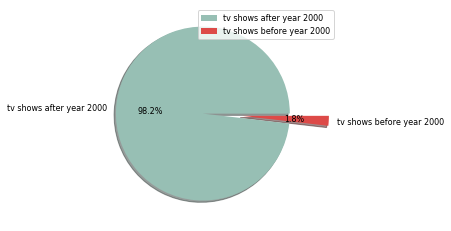

In \[131\]:

    movie_country={}
    tvshow_country={}
    for i,j in zip(range(len(df["type"])),range(len(df["country"]))):
        if df['type'][i]=="Movie":
            movie_country[df["country"][j]]=len([ g for z,g in zip(df["type"],df["country"]) if z=="Movie" and g==df["country"][j]])

    {'United States': 2058, nan: 0, 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia': 1, 'Germany, Czech Republic': 1, 'India': 893, 'United States, India, France': 1, 'China, Canada, United States': 3, 'South Africa, United States, Japan': 1, 'Japan': 76, 'Nigeria': 86, 'Spain, United States': 1, 'France': 75, 'United Kingdom, United States': 63, 'United Kingdom, Australia, France': 1, 'United Kingdom, Australia, France, United States': 1, 'United States, Canada': 51, 'Germany, United States': 12, 'South Africa, United States': 4, 'United States, Mexico': 11, 'United States, Italy, France, Japan': 1, 'United States, Italy, Romania, United Kingdom': 1, 'Australia, United States': 10, 'Argentina, Venezuela': 1, 'United States, United Kingdom, Canada': 2, 'China, Hong Kong': 13, 'Canada': 122, 'Hong Kong': 50, 'United States, China, Hong Kong': 2, 'Italy, United States': 3, 'United States, Germany': 17, 'United Kingdom, Canada, United States': 6, 'United States, United Kingdom': 38, 'United Kingdom': 206, 'India, Nepal': 1, 'New Zealand, Australia, France, United States': 1, 'Italy, Brazil, Greece': 1, 'Colombia': 13, 'United States, Japan': 6, 'Mexico': 70, 'Belgium, United Kingdom': 1, 'Switzerland, United Kingdom, Australia': 1, 'South Africa': 24, 'Canada, United States': 32, 'Brazil': 50, 'Argentina': 38, 'Argentina, Spain': 7, 'United States, Nigeria': 2, 'Bulgaria, United States': 3, 'Spain, United Kingdom, United States': 1, 'United States, China': 8, 'United States, France': 14, 'Spain, France, United Kingdom, United States': 1, ', France, Algeria': 1, 'Poland': 18, 'France, Israel, Germany, United States, United Kingdom': 1, 'Australia': 39, 'New Zealand': 10, 'Saudi Arabia': 5, 'Thailand': 37, 'Indonesia': 77, 'Egypt, Denmark, Germany': 1, 'Italy': 32, 'United States, Switzerland': 1, 'Hong Kong, Canada, United States': 1, 'Kuwait, United States': 1, 'France, Canada, United States, Spain': 1, 'France, Netherlands, Singapore': 1, 'Egypt': 92, 'Malaysia': 16, 'South Korea, Czech Republic': 1, 'South Korea': 41, 'Vietnam': 7, 'United Kingdom, Belgium': 2, 'United Kingdom, Australia, United States': 1, 'France, Japan, United States': 1, 'United Kingdom, Germany, Spain, United States': 1, 'United Kingdom, United States, France, Italy': 1, 'United States, Germany, Canada': 3, 'United States, France, Italy, United Kingdom': 1, 'United States, United Kingdom, Germany, Hungary': 1, 'United States, New Zealand': 2, 'Lebanon': 9, 'Romania': 6, 'Lebanon, Syria': 1, 'Philippines': 73, 'Germany': 47, 'United States, India': 8, 'China, United States, Canada': 1, 'Lebanon, United Arab Emirates': 1, 'Canada, United States, Denmark': 1, 'United Arab Emirates': 13, 'Mexico, France, Colombia': 1, 'Netherlands': 15, 'Spain': 97, 'Sweden': 5, 'Germany, United States, France': 1, 'United States, Bulgaria': 4, 'United Kingdom, France, Germany, United States': 2, 'Syria, France, Lebanon, Qatar': 1, 'Belgium, Netherlands': 1, 'Mauritius': 1, 'Canada, South Africa': 2, 'Austria': 5, 'Mexico, Brazil': 1, 'France, United States': 6, 'China': 28, 'Turkey': 76, 'Germany, France': 1, 'United Kingdom, France, Spain, United States': 1, 'United States, Australia': 10, 'United States, United Kingdom, France': 4, 'United States, Russia': 3, 'United States, United Kingdom, New Zealand': 1, 'Canada, Nigeria, United States': 1, 'France, United States, United Kingdom, Canada': 1, 'India, United Kingdom': 2, 'Canada, United States, Mexico': 1, 'United Kingdom, Germany, United States': 2, 'Czech Republic, United Kingdom, United States': 1, 'China, Taiwan': 2, 'United States, China, United Kingdom': 1, 'Cameroon': 1, 'Lebanon, Palestine, Denmark, Qatar': 1, 'Japan, United States': 9, 'Egypt, Saudi Arabia': 1, 'United Kingdom, France, Poland, Germany, United States': 1, 'Ireland, Switzerland, United Kingdom, France, United States': 1, 'China, United Kingdom': 1, 'United Kingdom, South Africa, France': 1, 'Ireland, United Kingdom, France, Germany': 1, 'Russia, United States': 1, 'United Kingdom, United States, France': 2, 'Taiwan': 13, 'United Kingdom,': 2, 'United States, India, United Kingdom': 1, 'Kenya': 3, 'Spain, Argentina': 3, 'India, United Kingdom, France, Qatar': 1, 'Belgium, France': 3, 'Argentina, Chile': 2, 'United States, Thailand': 2, 'Chile, Brazil': 1, 'Canada, United States, United Kingdom': 4, 'Uruguay': 3, 'United States, Cambodia, Romania': 1, 'Bangladesh': 3, 'Spain, Belgium, United States': 1, 'United Kingdom, United States, Australia': 3, 'Portugal, United States': 1, 'Portugal, Spain': 2, 'India, United States': 9, 'United Kingdom, Ireland': 2, 'United Kingdom, Spain, United States': 1, 'Hungary, United States': 1, 'United States, South Korea': 2, 'Canada, United States, Cayman Islands': 1, 'India, France': 5, 'France, Canada': 2, 'Canada, Hungary, United States': 1, 'Norway': 6, 'United Kingdom, Germany, France, United States': 1, 'France, Algeria': 1, 'Philippines, Canada, United Kingdom, United States': 1, 'Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong': 1, 'Singapore': 6, 'France, Belgium': 24, 'Iceland': 2, 'United States, France, Serbia': 1, 'United States, Italy': 4, 'Hong Kong, United States': 4, 'United States, Malta, France, United Kingdom': 1, 'United States, China, Canada': 1, 'Lebanon, Canada, France': 2, 'Spain, France, Canada': 1, 'United States, China, Colombia': 1, 'Spain, Thailand, United States': 1, 'Mexico, Spain': 3, 'Ireland, Luxembourg, Belgium': 1, 'China, United States': 2, 'Canada, Belgium': 1, 'Canada, United Kingdom': 1, 'Lebanon, United Arab Emirates, France, Switzerland, Germany': 1, 'France, Belgium, Italy': 1, 'Lebanon, United States, United Arab Emirates': 1, 'Lebanon, France': 1, 'France, Lebanon': 1, 'France, Lebanon, United Kingdom': 1, 'France, Norway, Lebanon, Belgium': 1, 'Sweden, Czech Republic, United Kingdom, Denmark, Netherlands': 1, 'United States, United Kingdom, India': 1, 'Indonesia, Netherlands': 1, 'Turkey, South Korea': 1, 'Serbia, United States': 2, 'Namibia': 1, 'United Kingdom, Kenya': 1, 'United Kingdom, France, United States, Belgium, Luxembourg, China, Germany': 1, 'Thailand, United States': 2, 'United States, France, Canada, Belgium': 1, 'Germany, China, United Kingdom': 1, 'Hong Kong, Iceland, United States': 1, 'United States, Belgium, Canada, France': 1, 'South Africa, Angola': 1, 'United States, Philippines': 1, 'United States, United Kingdom, Canada, China': 1, 'United States, Canada, United Kingdom': 1, 'Turkey, United States': 2, 'Peru, Germany, Norway': 1, 'Mozambique': 1, 'Brazil, France': 2, 'China, Spain, South Korea, United States': 1, 'Spain, Germany': 3, 'Hong Kong, China': 16, 'France, Belgium, Luxembourg, Cambodia,': 1, 'Indonesia, United Kingdom': 1, 'Switzerland, France, Belgium, United States': 1, 'Ghana': 3, 'Spain, France, Canada, United States': 1, 'United Kingdom, Nigeria': 2, 'Chile': 11, 'France, Egypt': 3, 'Egypt, France': 2, 'France, Brazil, Spain, Belgium': 1, 'Egypt, Algeria': 1, 'Canada, South Korea, United States': 1, 'Nigeria, United Kingdom': 1, 'United Arab Emirates, Jordan, Lebanon, Saudi Arabia': 1, 'Saudi Arabia, United Arab Emirates': 1, 'Zimbabwe': 1, 'United Kingdom, Germany, United Arab Emirates, New Zealand': 1, 'Romania, United States': 1, 'Mexico, United States': 7, 'Kuwait': 4, 'Canada, Nigeria': 1, 'Saudi Arabia, Netherlands, Germany, Jordan, United Arab Emirates, United States': 1, 'India, United Kingdom, China, Canada, Japan, South Korea, United States': 1, 'Turkey, India': 1, 'Italy, Turkey': 1, 'United Kingdom, United States, Japan': 1, 'France, Belgium, United States': 1, 'Uruguay, Argentina': 1, 'United States, United Kingdom, Japan': 1, 'United States, Argentina': 2, 'United Kingdom, Italy': 2, 'Ireland, United Kingdom': 2, 'United Kingdom, France, Belgium, Canada, United States': 1, 'Netherlands, Germany, Denmark, United Kingdom': 1, 'Hungary': 4, 'Pakistan, United States': 2, 'Romania, France, Switzerland, Germany': 1, 'Romania, United Kingdom': 1, 'France, Malta, United States': 1, 'United Kingdom, France, Belgium, Ireland, United States': 1, 'United States, Norway, Canada': 1, 'Poland, United States': 2, 'Kenya, United States': 1, 'Uruguay, Argentina, Germany, Spain': 1, 'United States, United Kingdom, France, Germany, Japan': 1, 'United States, France, Japan': 2, 'United Kingdom, France, United States': 4, 'Spain, France, United States': 1, 'Indonesia, South Korea, Singapore': 1, 'South Korea, United States': 3, 'United States, Spain': 4, 'Argentina, Uruguay, Serbia': 1, 'Israel, United States': 3, 'France, Japan': 1, 'United Kingdom, United States, Germany, Denmark, Belgium, Japan': 1, 'India, Germany': 2, 'India, United Kingdom, Canada, United States': 1, 'Philippines, United States': 1, 'Romania, Bulgaria, Hungary': 1, 'Uruguay, Guatemala': 1, 'France, Senegal, Belgium': 1, 'Canada, Norway': 1, 'Finland, Germany, Belgium': 1, 'United Kingdom, France': 5, 'United States, Chile': 2, 'United Kingdom, Japan, United States': 3, 'Spain, United Kingdom': 1, 'United States, South Korea, Japan': 1, 'United Kingdom, Hungary, Australia': 1, 'Italy, Belgium': 1, 'United States, United Kingdom, Germany': 2, 'Switzerland': 1, 'Singapore, Malaysia': 1, 'France, Belgium, Luxembourg, Romania, Canada, United States': 1, 'South Africa, Nigeria': 1, 'Spain, France': 5, 'United Kingdom, Hong Kong': 1, 'Pakistan': 14, 'Brazil, United States': 1, 'Denmark, Brazil, France, Portugal, Sweden': 1, 'India, Turkey': 1, 'Philippines, Singapore': 1, 'Taiwan, China, France, United States': 1, 'Germany, Italy': 1, 'Colombia, Peru, United Kingdom': 1, 'Thailand, China, United States': 1, 'Argentina, United States': 1, 'Sweden, United States': 3, 'Uruguay, Spain, Mexico': 1, 'France, Luxembourg, Canada': 1, 'Denmark, Spain': 1, 'Chile, Argentina': 1, 'United Kingdom, Belgium, Sweden': 1, 'Denmark': 5, 'Italy, France': 5, 'Canada, Germany': 1, 'Pakistan, United Arab Emirates': 1, 'Ghana, United States': 1, 'Mexico, Finland': 1, 'United Arab Emirates, United Kingdom, India': 1, 'Netherlands, Belgium': 2, 'United States, Taiwan': 1, 'Austria, Iraq, United States': 1, 'United Kingdom, Malawi': 1, 'Paraguay, Argentina': 1, 'United Kingdom, Russia, United States': 1, 'India, Pakistan': 1, 'Indonesia, Singapore': 2, 'Spain, Belgium': 1, 'Iceland, Sweden, Belgium': 1, 'Uruguay, Argentina, Spain': 1, 'Canada, Germany, France, United States': 1, 'United Kingdom, Japan': 1, 'Norway, Denmark, Netherlands, Sweden': 1, 'Hong Kong, China, United States': 2, 'Ireland, Canada': 1, 'Italy, Switzerland, France, Germany': 1, 'Mexico, Netherlands': 1, 'France, Iran, United States': 1, 'United Kingdom, India': 2, 'Russia, Poland, Serbia': 1, 'Spain, Portugal': 1, 'Peru': 4, 'Mexico, Argentina': 1, 'United Kingdom, Canada, United States, Cayman Islands': 1, 'Indonesia, United States': 1, 'United States, Israel, United Kingdom, Canada': 1, 'Norway, Iceland, United States': 2, 'United Kingdom, India, United States': 2, 'India, Australia': 1, 'United States,': 1, 'Belgium, United Kingdom, United States': 1, 'India, Germany, Austria': 1, 'Spain, Mexico': 2, 'China, Japan': 1, 'Argentina, France': 1, 'China, United States, United Kingdom': 1, 'France, Luxembourg, United States': 1, 'China, United States, Australia': 1, 'Colombia, Mexico': 1, 'United States, Canada, Ireland': 1, 'Israel': 5, 'Chile, Peru': 1, 'Argentina, Italy': 1, 'Canada, Japan, United States': 1, 'United Kingdom, Canada, United States, Germany': 1, 'Italy, Switzerland, Albania, Poland': 1, 'Cambodia': 1, 'Italy, United States, Argentina': 1, 'United States, Canada, Indonesia, United Kingdom, China, Singapore': 1, 'Spain, Colombia': 1, 'Bulgaria': 1, 'Argentina, Brazil, France, Poland, Germany, Denmark': 1, 'United Kingdom, Spain, United States, Germany': 1, 'Philippines, Qatar': 1, 'Netherlands, Belgium, Germany, Jordan': 1, 'United Arab Emirates, United States': 2, 'United Kingdom, Germany': 3, 'United Kingdom, Canada': 2, 'Georgia': 1, 'Soviet Union, India': 1, 'Australia, United Arab Emirates': 2, 'Czech Republic, United States': 1, 'South Korea, China, United States': 1, 'India, Soviet Union': 2, 'India, Mexico': 1, 'Georgia, Germany, France': 1, 'United Arab Emirates, Romania': 1, 'Australia, Canada': 1, 'India, Malaysia': 1, 'Germany, Jordan, Netherlands': 1, 'Turkey, France, Germany, Poland': 1, 'Greece, United States': 1, 'Norway, Germany': 1, 'France, Morocco': 1, 'Cambodia, United States': 1, 'United States, Denmark': 1, 'United Kingdom, Italy, Israel, Peru, United States': 1, 'Argentina, Uruguay, Spain, France': 1, 'United Kingdom, France, United States, Belgium': 1, 'France, Canada, China, Cambodia': 1, 'United Kingdom, France, Belgium, United States': 1, 'Ireland': 7, 'Chile, France': 1, 'Netherlands, United States': 1, 'France, United Kingdom, India': 1, 'Czech Republic, Slovakia': 1, 'Singapore, France': 1, 'Spain, Switzerland': 1, 'United States, Australia, China': 1, 'South Africa, United States, Germany': 1, 'Spain, Italy, Argentina': 1, 'Chile, Spain, Argentina, Germany': 1, 'West Germany': 1, 'Austria, Czech Republic': 1, 'Lebanon, Qatar': 1, 'United Kingdom, Jordan, Qatar, Iran': 1, 'France, South Korea, Japan': 1, 'Israel, Germany, France': 1, 'United States, Hungary': 1, 'France, Qatar': 1, 'United Kingdom, Germany, Canada': 1, 'Ireland, South Africa': 1, 'Chile, United States, France': 1, 'Denmark, United States': 1, 'Canada, United Kingdom, United States': 1, 'Belgium, France, Netherlands': 1, 'United Kingdom, Ukraine, United States': 1, 'United States, Bermuda, Ecuador': 1, 'United Kingdom, Egypt, United States': 1, 'United States, France, United Kingdom': 1, 'Spain, Mexico, France': 1, 'United States, South Africa': 3, 'Hong Kong, China, Singapore': 1, 'South Africa, China, United States': 1, 'Denmark, France, Poland': 1, 'New Zealand, United Kingdom': 1, 'Netherlands, Denmark, South Africa': 1, 'Iran, France': 1, 'United Kingdom, United States, France, Germany': 1, 'Australia, France': 1, 'Ireland, United Kingdom, United States': 1, 'Spain, Italy': 1, 'United Kingdom, France, Germany': 1, 'Canada, Luxembourg': 1, 'Brazil, Netherlands, United States, Colombia, Austria, Germany': 1, 'France, Canada, Belgium': 1, 'Bulgaria, United States, Spain, Canada': 1, 'Sweden, Netherlands': 1, 'France, United States, Mexico': 1, 'Australia, United Kingdom, United Arab Emirates, Canada': 1, 'Singapore, United States': 1, 'Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay': 1, 'India, Iran': 1, 'France, Belgium, Spain': 1, 'Denmark, Sweden, Israel, United States': 1, 'United States, Iceland': 1, 'United Kingdom, Russia': 1, 'Netherlands, Denmark, France, Germany': 1, 'South Korea, Japan': 1, 'United Kingdom, Pakistan': 1, 'France, New Zealand': 1, 'United Kingdom, Czech Republic, United States, Germany, Bahamas': 1, 'China, Germany, India, United States': 1, 'Germany, Sri Lanka': 1, 'United States, Sweden': 2, 'United States, India, Bangladesh': 1, 'United States, Canada, France': 1, 'Brazil, France, Germany': 1, 'United States, United Kingdom, Australia': 3, 'Germany, United States, Hong Kong, Singapore': 1, 'France, Germany, Switzerland': 1, 'Germany, France, Luxembourg, United Kingdom, United States': 1, 'United Kingdom, Canada, Italy': 1, 'Czech Republic, France': 1, 'Taiwan, Hong Kong, United States, China': 1, 'Germany, Australia': 1, 'United Kingdom, Poland, United States': 1, 'Denmark, Zimbabwe': 1, 'United Kingdom, South Africa': 1, 'Finland, Sweden, Norway, Latvia, Germany': 1, 'South Africa, United States, New Zealand, Canada': 1, 'United States, Italy, United Kingdom, Liechtenstein': 1, 'Denmark, France, Belgium, Italy, Netherlands, United States, United Kingdom': 1, 'United States, Australia, Mexico': 1, 'United Kingdom, Czech Republic, Germany, United States': 1, 'France, China, Japan, United States': 1, 'Germany, Belgium': 1, 'Pakistan, Norway, United States': 1, 'United States, Canada, Belgium, United Kingdom': 1, 'Venezuela': 1, 'Canada, France, Italy, Morocco, United States': 1, 'Canada, Spain, France': 1, 'United States, Indonesia': 1, 'Spain, France, Italy': 1, 'United Arab Emirates, United States, United Kingdom': 1, 'United Kingdom, Israel, Russia': 1, 'United States, Brazil': 1, 'United States, France, Mexico': 1, 'United States, Nicaragua': 1, 'France, United Kingdom, United States': 1, 'United Kingdom, United States, Spain, Germany, Greece, Canada': 2, 'Russia': 1, 'United Kingdom, Denmark, Canada, Croatia': 1, 'United States, France, United Kingdom, Japan': 1, 'United States, United Kingdom, Denmark, Sweden': 1, 'United States, United Kingdom, Italy': 1, 'United States, France, Canada, Spain': 1, 'Russia, United States, China': 1, 'United States, Canada, Germany': 1, 'Ireland, United States': 1, 'United States, United Arab Emirates': 3, 'United States, Ireland': 2, 'Ireland, United Kingdom, Italy, United States': 1, 'Poland,': 1, 'Slovenia, Croatia, Germany, Czech Republic, Qatar': 1, 'Canada, United Kingdom, Netherlands': 1, 'United States, Spain, Germany': 1, 'India, Japan': 1, 'China, South Korea, United States': 1, 'United Kingdom, France, Belgium': 1, 'Canada, Ireland, United States': 1, 'United Kingdom, United States, Dominican Republic': 1, 'United States, Senegal': 1, 'Germany, United Kingdom, United States': 1, 'South Africa, Germany, Netherlands, France': 1, 'Ireland, United States, France': 1, 'Germany, United States, Canada': 1, 'United Kingdom, Germany, Canada, United States': 1, 'United States, France, Canada, Lebanon, Qatar': 1, 'Netherlands, Belgium, United Kingdom, United States': 1, 'France, Belgium, China, United States': 1, 'United States, Chile, Israel': 1, 'United Kingdom, Norway, Denmark, Germany, Sweden': 1, 'Norway, Denmark, Sweden': 1, 'China, India, Nepal': 1, 'United Kingdom, South Korea': 1, 'Denmark, China': 1, 'United States, Greece, Brazil': 1, 'United States, Australia, Samoa, United Kingdom': 1, 'Germany, United Kingdom': 2, 'Argentina, Chile, Peru': 1, 'Poland, West Germany': 1, 'Germany, United States, Sweden': 1, 'Canada, Spain': 1, 'United States, Cambodia': 1, 'United States, Greece': 2, 'Norway, United Kingdom, France, Ireland': 1, 'United Kingdom, Poland': 1, 'Israel, Sweden, Germany, Netherlands': 1, 'Switzerland, France': 1, 'Italy, India': 1, 'United States, Botswana': 1, 'Chile, Argentina, France, Spain, United States': 1, 'United States, India, South Korea, China': 1, 'Denmark, Germany, Belgium, United Kingdom, France': 1, 'Denmark, Germany, Belgium, United Kingdom, France, Sweden': 1, 'France, Switzerland, Spain, United States, United Arab Emirates': 1, 'Brazil, India, China, United States': 1, 'Denmark, France, United States, Sweden': 1, 'Australia, Iraq': 1, 'China, Morocco, Hong Kong': 1, 'Canada, United States, Germany': 1, 'United Kingdom, Thailand': 1, 'Venezuela, Colombia': 1, 'France, Germany, Czech Republic, Belgium': 1, 'Switzerland, Vatican City, Italy, Germany, France': 1, 'Portugal, France, Poland, United States': 1, 'India, Switzerland': 1, 'Canada, India': 2, 'United States, Morocco': 1, 'Singapore, Japan, France': 1, 'Canada, Mexico, Germany, South Africa': 1, 'United Kingdom, United States, Canada': 1, 'Germany, France, United States, Canada, United Kingdom': 1, 'United States, Uruguay': 1, 'India, Canada': 1, 'Ireland, Canada, United Kingdom, United States': 1, 'United States, Germany, Australia': 1, 'Australia, France, Ireland': 1, 'Australia, India': 1, 'United States, United Kingdom, Canada, Japan': 1, 'Sweden, United Kingdom, Finland': 1, 'Hong Kong, Taiwan': 1, 'United States, United Kingdom, Spain, South Korea': 1, 'Guatemala': 1, 'United States, Germany, United Kingdom, Australia': 1, 'Italy, France, Switzerland': 1, 'Canada, France, United States': 1, 'Switzerland, United States': 1, 'Thailand, Canada, United States': 1, 'China, Hong Kong, United States': 1, 'United Kingdom, New Zealand': 1, 'Czech Republic, United Kingdom, France': 1, 'Australia, United Kingdom, Canada': 1, 'Jamaica, United States': 1, 'Australia, United Kingdom, United States, New Zealand, Italy, France': 1, 'Australia, United Kingdom': 1, 'United Kingdom, France, Canada, Belgium, United States': 1, 'Denmark, United Kingdom, Sweden': 1, 'United States, Hong Kong': 3, 'United States, Kazakhstan': 1, 'Argentina, France, United States, Germany, Qatar': 1, 'United States, Germany, United Kingdom': 1, 'United States, Germany, United Kingdom, Italy': 1, 'United States, New Zealand, United Kingdom': 1, 'Finland, United States': 1, 'Spain, France, Uruguay': 1, 'France, Canada, United States': 1, 'United States, Canada, China': 1, 'Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India': 1, 'United States, Czech Republic, United Kingdom': 1, 'Israel, Germany': 1, 'Mexico, France': 1, 'Israel, Germany, Poland, Luxembourg, Belgium, France, United States': 1, 'Austria, United States': 1, 'United Kingdom, Lithuania': 1, 'United States, Greece, United Kingdom': 1, 'United Kingdom, China, United States, India': 1, 'United States, Sweden, Norway': 1, 'United Kingdom, United States, Morocco': 1, 'United States, United Kingdom, Morocco': 1, 'Spain, Canada, United States': 1, 'United States, India, United Arab Emirates': 1, 'United Kingdom, Canada, France, United States': 1, 'Belgium, Ireland, Netherlands, Germany, Afghanistan': 1, 'France, Canada, Italy, United States, China': 1, 'Ireland, United Kingdom, Greece, France, Netherlands': 1, 'Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands': 1, 'New Zealand, United States': 2, 'United States, Australia, South Africa, United Kingdom': 1, 'United States, Germany, Mexico': 1, 'United States, Czech Republic': 2, 'Somalia, Kenya, Sudan, South Africa, United States': 1, 'United States, Canada, Japan, Panama': 1, 'United Kingdom, Spain, Belgium': 1, 'Serbia, South Korea, Slovenia': 1, 'Denmark, United Kingdom, South Africa, Sweden, Belgium': 1, 'Germany, Canada, United States': 1, 'New Zealand, United Kingdom, Australia': 1, 'Belgium': 1, 'United Kingdom, Australia, Canada, United States': 1, 'United States, Venezuela': 1, 'United Kingdom, Canada, Japan': 1, 'United Kingdom, China, United States': 1, 'United Kingdom, Brazil, Germany': 1, 'United Kingdom, Namibia, South Africa, Zimbabwe, United States': 1, 'Canada, United States, India, United Kingdom': 1, 'Switzerland, United Kingdom, United States': 1, 'United Kingdom, India, Sweden': 1, 'United States, Brazil, India, Uganda, China': 1, 'Peru, United States, United Kingdom': 1, 'Germany, United States, United Kingdom, Canada': 1, 'Canada, India, Thailand, United States, United Arab Emirates': 1, 'United States, East Germany, West Germany': 1, 'France, Netherlands, South Africa, Finland': 1, 'Egypt, Austria, United States': 1, 'Russia, Spain': 1, 'Croatia, Slovenia, Serbia, Montenegro': 1, 'United Arab Emirates, Jordan': 1}

In \[132\]:

    for i,j in zip(range(len(df["type"])),range(len(df["country"]))):
        if df['type'][i]=="TV Show":
            tvshow_country[df["country"][j]]=len([ g for z,g in zip(df["type"],df["country"]) if z=="TV Show" and g==df["country"][j]])

    {'South Africa': 6, nan: 0, 'India': 79, 'United Kingdom': 213, 'United States': 760, 'Mexico': 40, 'Turkey': 29, 'Australia': 48, 'Finland': 1, 'Nigeria': 9, 'Japan': 169, 'Belgium': 8, 'United States, United Kingdom': 9, 'France, United States': 4, 'South Korea': 158, 'Spain': 48, 'United States, Singapore': 1, 'Russia': 14, ', South Korea': 1, 'Ireland': 3, 'Italy': 13, 'France': 49, 'Argentina': 18, 'Jordan': 2, 'Colombia': 22, 'Israel, United States': 2, 'Taiwan': 68, 'Germany': 20, 'United States, Canada': 22, 'Canada, United States': 13, 'United States, Japan': 10, 'Poland': 6, 'Canada': 59, 'France, Belgium': 3, 'Thailand': 24, 'Ireland, United States, United Kingdom': 1, 'Israel': 8, 'Australia, New Zealand': 1, 'United Kingdom, Germany': 1, 'Belgium, Netherlands': 1, 'Australia, Germany': 1, 'Sweden': 8, 'China': 38, 'Finland, Germany': 1, 'Iceland': 3, 'Denmark': 8, 'Philippines, Singapore, Indonesia': 1, 'United Arab Emirates': 1, 'Norway, Denmark': 1, 'United States, Czech Republic': 3, 'Mexico, United States': 6, 'Australia, United Kingdom': 1, 'France, United Kingdom': 1, 'Lebanon': 6, 'United States, France': 2, 'China, United Kingdom': 2, 'Italy, United Kingdom': 1, 'United States, India': 1, 'United States, Brazil, Japan, Spain, India': 1, 'Uruguay, Germany': 1, 'United States, Mexico': 3, 'Egypt': 14, 'United States, Australia': 1, 'United States, Colombia': 3, 'Luxembourg': 1, 'Brazil': 27, 'Philippines': 2, 'Canada, United States, France': 2, 'Canada, United Kingdom, United States': 1, 'Denmark, United States': 2, 'Senegal': 1, 'United Kingdom, Finland, Germany, United States, Australia, Japan, France, Ireland': 1, 'Norway': 5, 'Netherlands': 4, 'United Kingdom, Canada, United States': 2, 'Saudi Arabia': 3, 'Kuwait': 2, 'Indonesia': 2, 'Spain, Italy': 1, 'United States, Ireland, United Kingdom, India': 1, 'United Kingdom, Singapore': 1, 'Canada, United States, Ireland': 1, 'United Kingdom, United States': 12, 'Japan, Canada, United States': 1, 'Denmark, Singapore, Canada, United States': 1, 'United States, France, Denmark': 1, 'Mexico, Spain': 1, 'Germany, Czech Republic': 1, 'United Kingdom, France, Germany, Spain': 1, 'United Kingdom, China': 1, 'Australia, New Zealand, United States': 1, 'France, Australia, Germany': 1, 'United Kingdom, Australia': 1, 'Belarus': 1, 'Chile, Italy': 1, 'Germany, United States': 1, 'United States, France, Canada': 1, 'Poland, United States': 2, 'United States, Mexico, Spain, Malta': 1, 'United Kingdom, Spain': 1, 'Finland, France': 1, 'United Kingdom, Germany, United States, France': 1, 'Italy, United Kingdom, France': 1, 'Australia, United States': 3, 'United States, Mexico, Colombia': 1, 'Japan, United States': 3, 'Puerto Rico, United States, Colombia': 1, 'Chile': 3, 'Austria, Germany': 1, 'Taiwan, China': 1, 'United Kingdom, United States, Ireland': 1, 'South Korea, United States': 3, 'Brazil, United Kingdom': 1, 'Cyprus': 1, 'France, South Korea, Japan, United States': 1, 'Taiwan, Malaysia': 1, 'Netherlands, Germany, Italy, Canada': 1, 'Spain, Germany, Denmark, United States': 1, 'Norway, Sweden': 1, 'South Korea, Canada, United States, China': 1, 'Mauritius, South Africa': 1, 'United States, Poland': 1, 'United Kingdom, Canada': 2, 'Mexico, United States, Spain, Colombia': 1, 'Singapore, United States': 1, 'Argentina, United States, Mexico': 1, 'Canada, Australia': 2, 'Argentina, Spain': 1, 'India, United States': 1, 'Malaysia, Singapore, Hong Kong': 1, 'Australia, Canada': 1, 'Hong Kong': 3, 'New Zealand': 2, 'Malaysia': 6, 'China, Hong Kong': 1, 'Canada, Brazil': 1, 'France, Canada': 1, 'Spain, United Kingdom': 1, 'Croatia': 1, 'United Kingdom, Ireland, United States': 1, 'United States, Sweden': 1, 'Germany, France, Russia': 1, 'Czech Republic, United States': 1, 'United Kingdom, West Germany': 1, 'United States, Brazil, South Korea, Mexico, Japan, Germany': 1, 'United States, Japan, Canada': 2, 'Saudi Arabia, Syria, Egypt, Lebanon, Kuwait': 1, 'United Kingdom, South Africa, Australia, United States': 1, 'Norway, Germany, Sweden': 1, 'South Korea, China': 1, 'United States, New Zealand': 3, 'Canada, Germany, South Africa': 1, 'Singapore': 17, 'France, United Kingdom, United States': 1, 'United States, Colombia, Mexico': 1, 'Italy, United States': 1, 'United States, United Kingdom, Australia': 1, 'Canada, Japan, Netherlands': 1, 'France, Germany': 1, 'United Kingdom, France': 1, 'United States, Russia': 1, 'Germany, Australia, France, China': 1, 'Norway, United States': 1, 'United States, Hungary, Ireland, Canada': 1, 'Canada, France': 1, 'United States, France, Japan': 5, 'United States, Israel, Italy, South Africa': 1, 'United States, South Korea, China': 2, 'United States, Chile': 1, 'Spain, Cuba': 1, 'United Kingdom, United States, Spain, Germany, Greece, Canada': 2, 'Italy, Canada, France': 1, 'Italy, Germany': 1, 'Canada, United Kingdom': 1, 'Pakistan': 4, 'United States, Italy': 1, 'Canada, United States, United Kingdom, France, Luxembourg': 1, 'United States, Ireland': 1, 'Colombia, Mexico, United States': 2, 'South Korea, France': 1, 'Turkey, Azerbaijan': 1, 'Colombia, United States': 1, 'Ireland, United Kingdom, United States': 1, 'France, Japan, United States': 1, 'United States, New Zealand, Japan': 1, 'United States, Netherlands, Japan, France': 1, 'United Kingdom, Ireland': 1, 'Ukraine': 2, 'Italy, South Africa, West Germany, Australia, United States': 1, 'Switzerland': 1, 'France, United States, Canada': 1, 'India, Germany, France': 1, 'Ireland, Canada, United States, United Kingdom': 1, 'Germany, United States, Italy': 1, 'United Kingdom, United States, Czech Republic': 1, 'Japan, Canada': 1, 'United States, France, South Korea, Indonesia': 1}

# Number of movies per country.<a href="#Number-of-movies-per-country." class="anchor-link">¶</a>

In \[140\]:

    key_movie=movie_country.keys()
    val_movie=movie_country.values()
    top_movies_country={}
    val_movie_sorted=sorted(val_movie,reverse=True)
    val_movie_sorted=val_movie_sorted[:10]
    #print(val_movie_sorted)
    for i,j in movie_country.items():
        if j in val_movie_sorted:
            top_movies_country[i]=j
    print(top_movies_country)        
    plt.figure(figsize=(50,50))
    plt.bar(top_movies_country.keys(),top_movies_country.values(),color=['r', 'b','#BCFF33', 'y', 'g', 'hotpink','k','#D433FF','#33FFAD','#FF3374'])
    plt.title("Countries With most Movies")
    plt.show()

    {'United States': 2058, 'India': 893, 'Japan': 76, 'Nigeria': 86, 'Canada': 122, 'United Kingdom': 206, 'Indonesia': 77, 'Egypt': 92, 'Spain': 97, 'Turkey': 76}

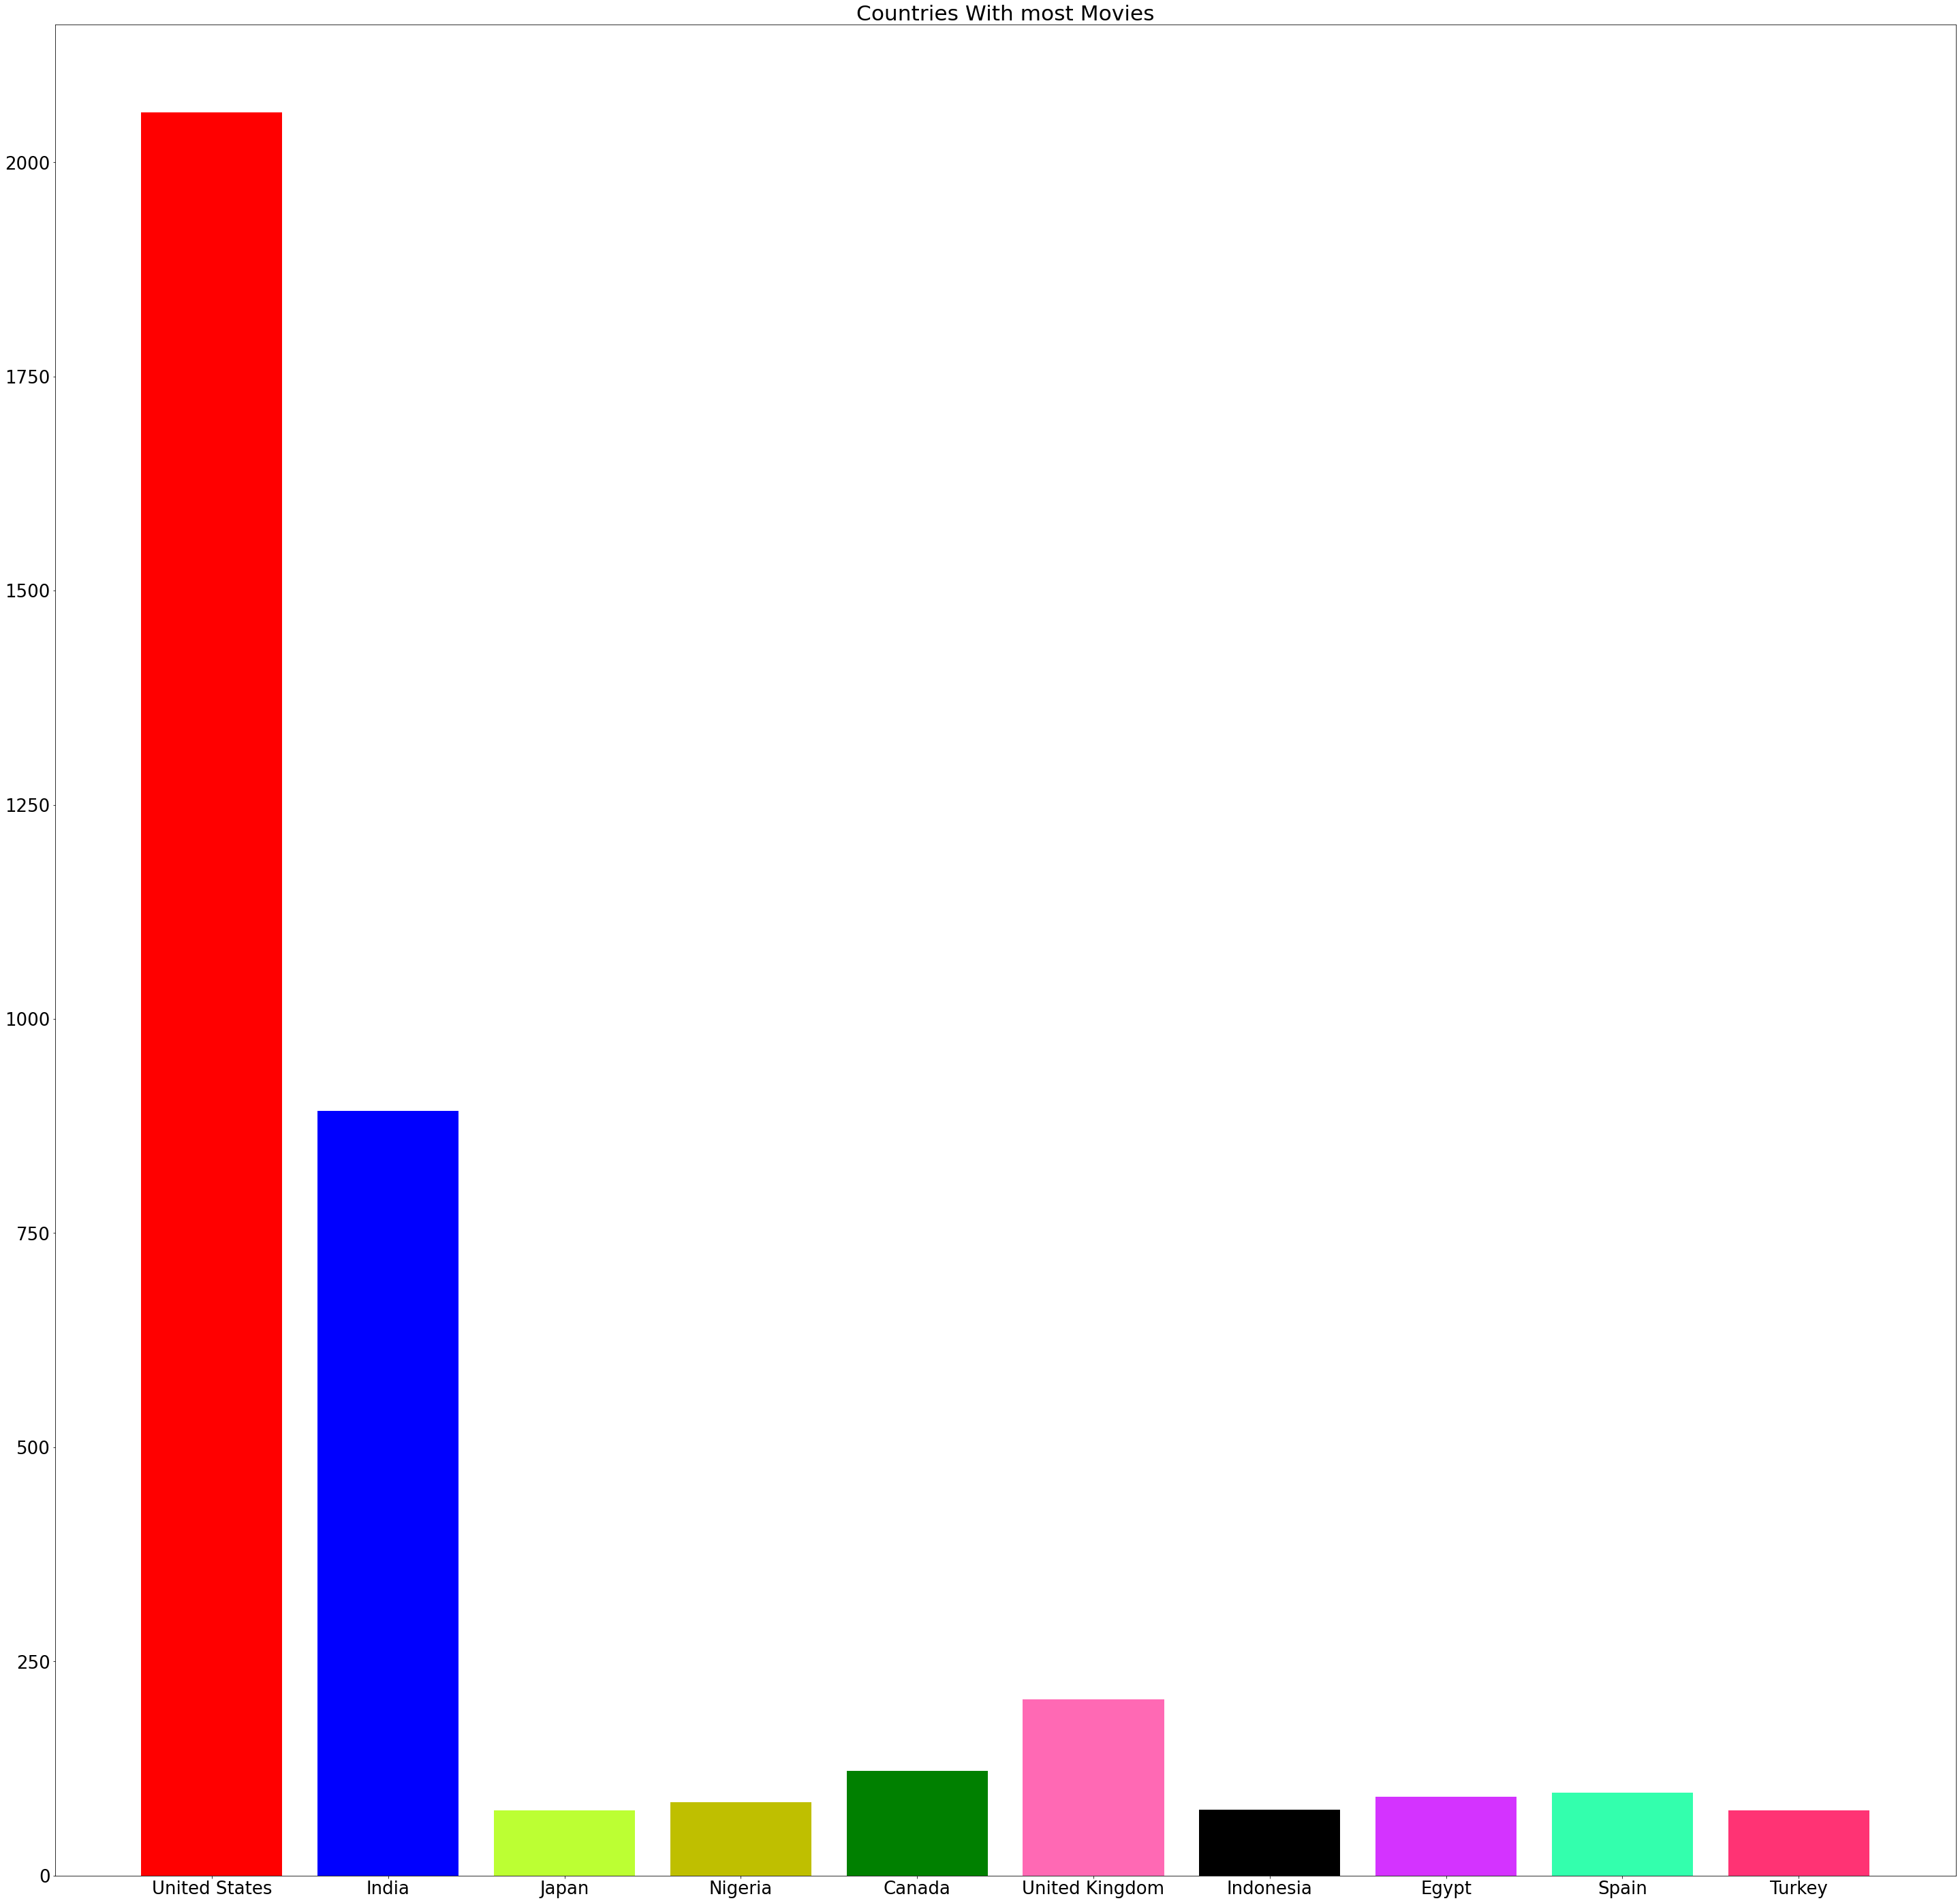

# Number of TV shows per country.<a href="#Number-of-TV-shows-per-country." class="anchor-link">¶</a>

In \[141\]:

    key_tvshow=tvshow_country.keys()
    val_tvshow=tvshow_country.values()
    top_tvshow_country={}
    val_tvshow_sorted=sorted(val_tvshow,reverse=True)
    val_tvshow_sorted=val_tvshow_sorted[:10]
    #print(val_movie_sorted)
    for i,j in tvshow_country.items():
        if j in val_tvshow_sorted:
            top_tvshow_country[i]=j
    print(top_tvshow_country)        
    plt.figure(figsize=(50,50))
    plt.bar(top_tvshow_country.keys(),top_tvshow_country.values(),color=['r', 'b','#BCFF33', 'y', 'g', 'hotpink','k','#D433FF','#33FFAD','#FF3374'])
    plt.title("Countries With most tvshows")
    plt.show()

    {'India': 79, 'United Kingdom': 213, 'United States': 760, 'Australia': 48, 'Japan': 169, 'South Korea': 158, 'Spain': 48, 'France': 49, 'Taiwan': 68, 'Canada': 59}

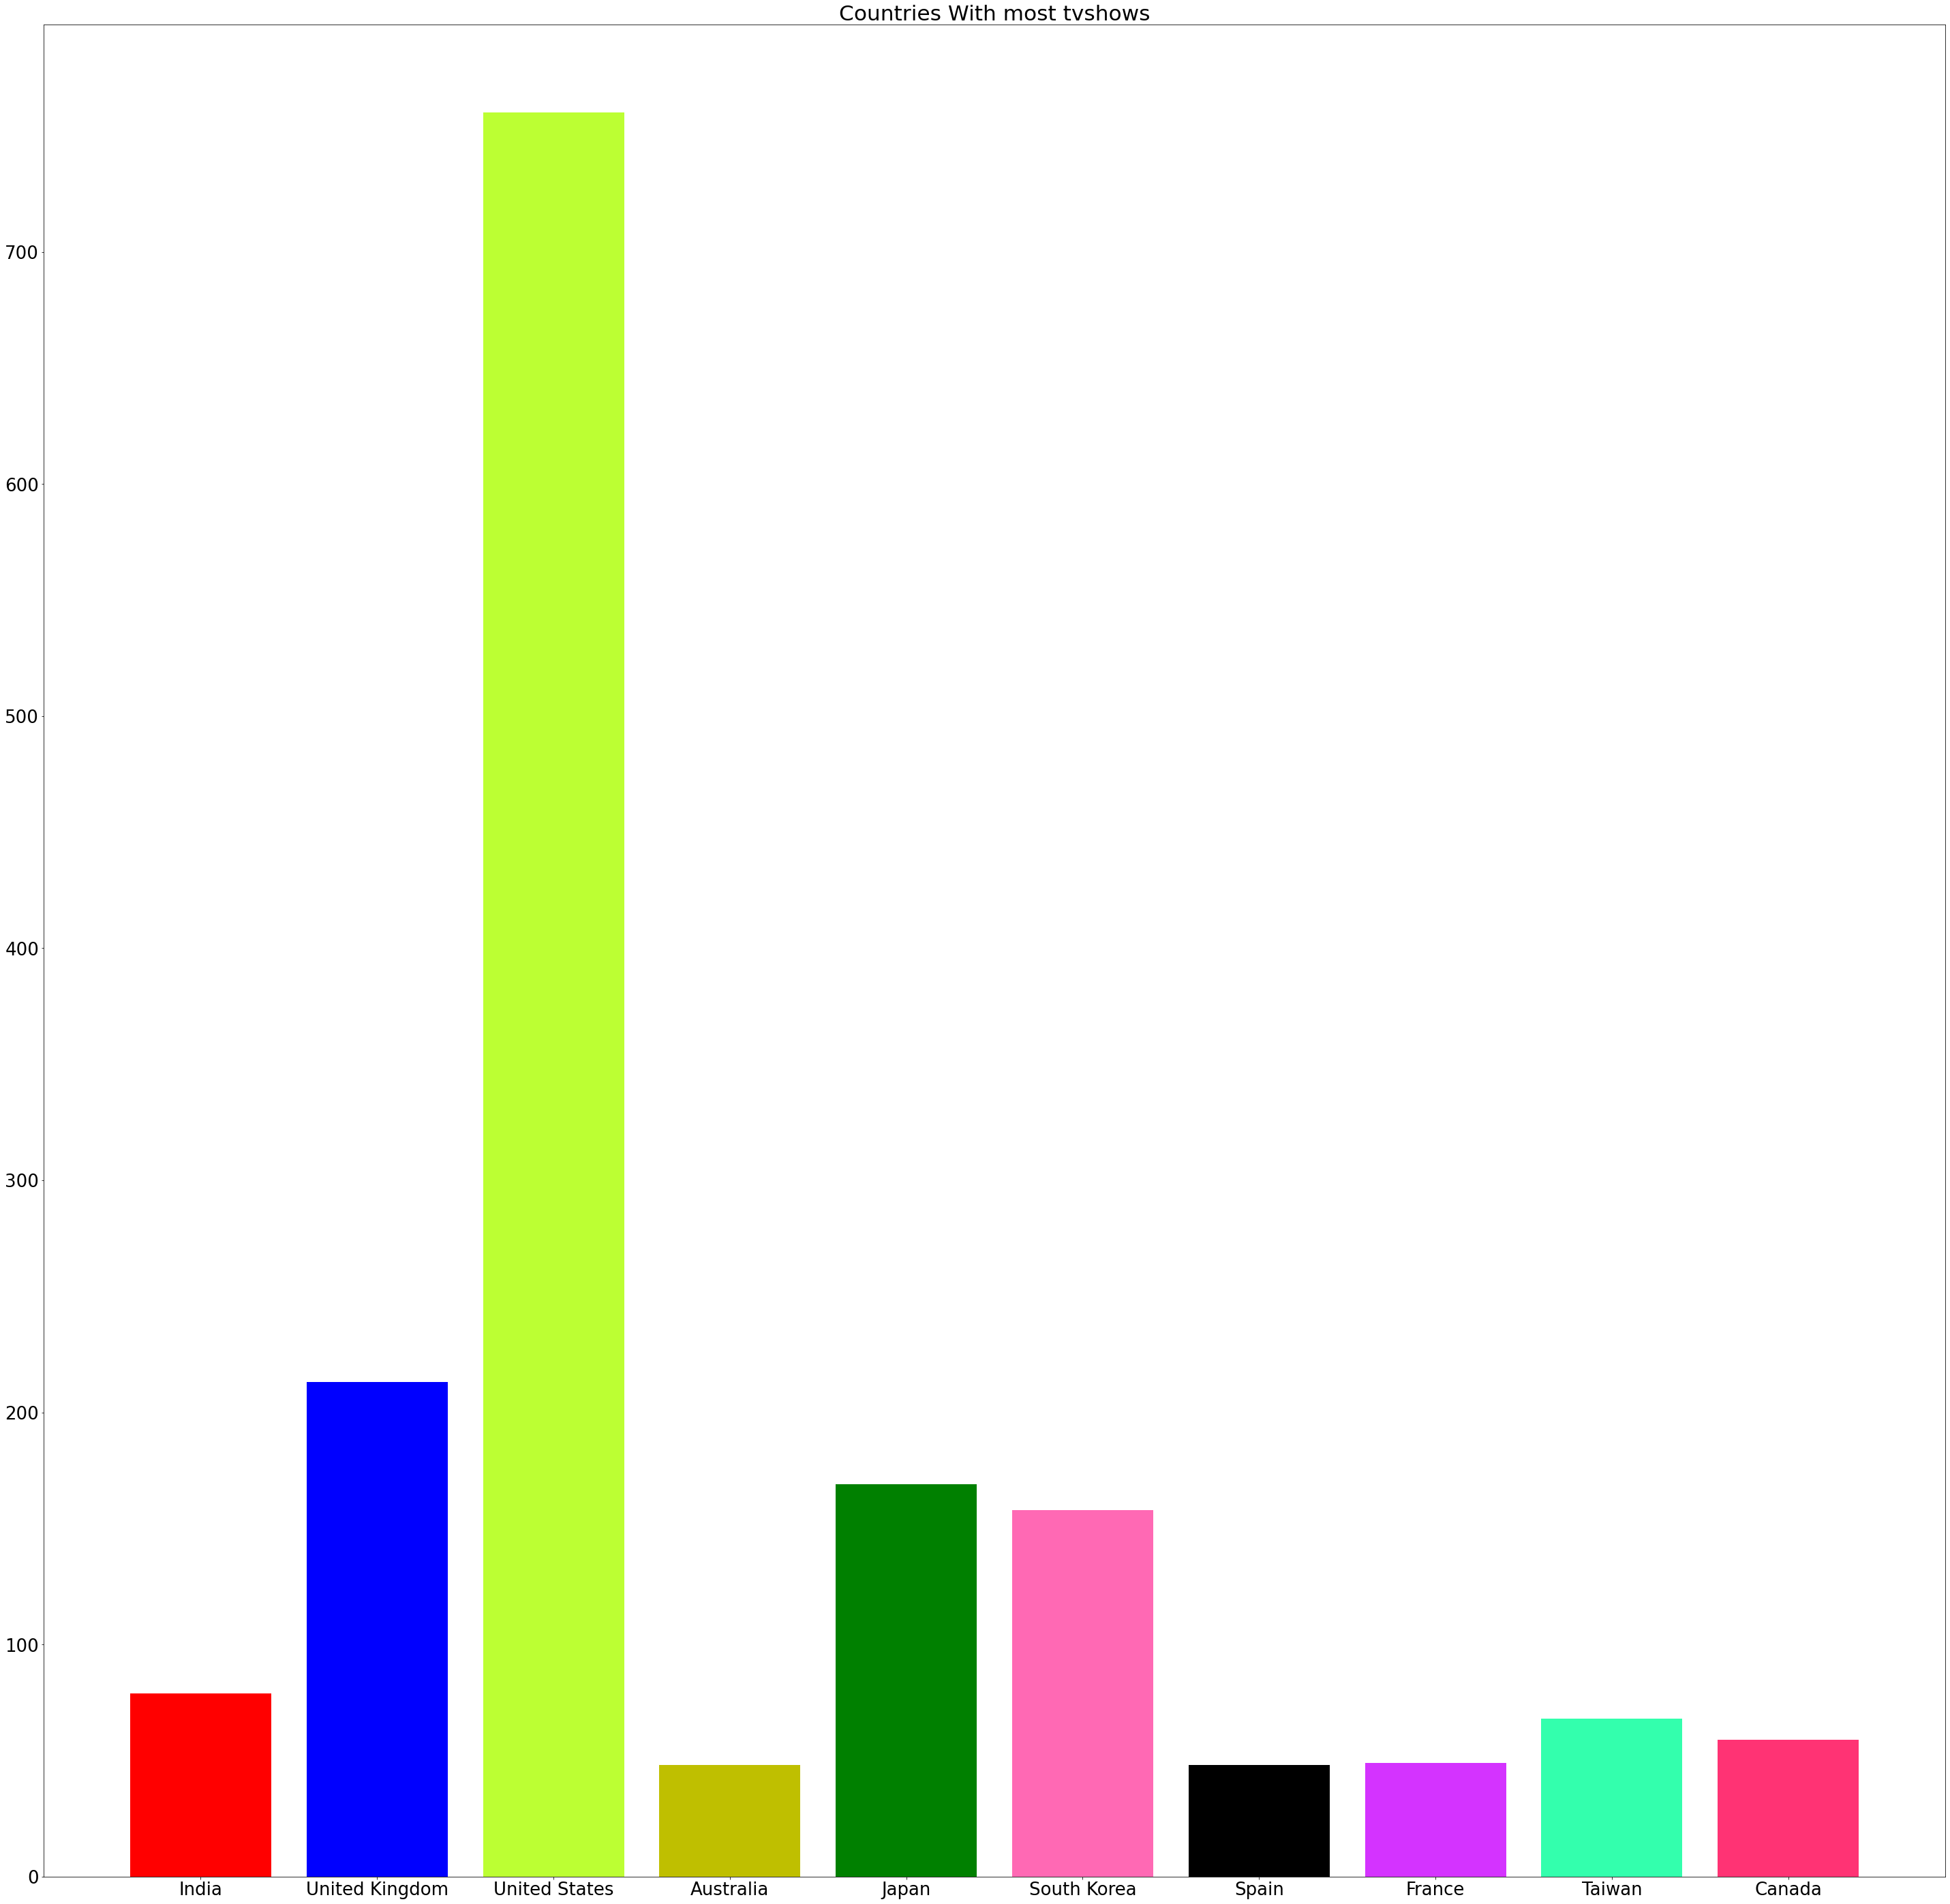

In \[ \]: